# Wygenerowanie rezultatów analizy danych w postaci wykresów

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Wczytanie przetworzonego pliku

In [2]:
df = pd.read_csv("../AnalysisData/Kujawsko-Pomorskie.csv")

## Analiza pojedynczych danych

### Ile dni minęło od zakupu?

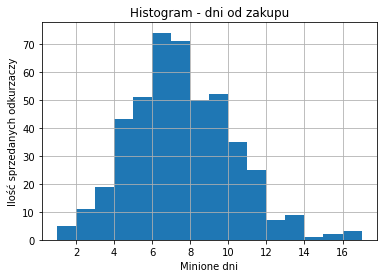

In [3]:
df['Dni od zakupu'].hist(bins=16)
plt.title('Histogram - dni od zakupu')
plt.xlabel('Minione dni')
plt.ylabel('Ilość sprzedanych odkurzaczy')
plt.show()

Z wykresu, można odczytać, że w dwa dni sprzedaż była zdecydowanie większa niż w pozostałych dniach. Było to dokładnie 6 oraz 7 dni przed badaniem, można więc przyjąć, że około tydzień przed. Zaskakującym faktem jest, że dwa tygodnie przed badaniem sprzedaż była bardzo niska, bo na poziomie mniej niż 10 odkurzaczy.

### Jaka marka jest najczęściej wybierana?

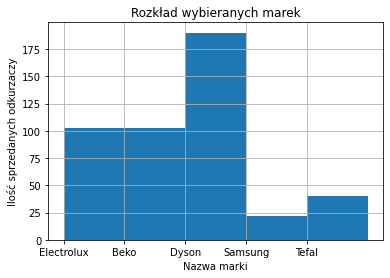

In [4]:
df['Marka'].hist(bins=range(0,6))
plt.title('Rozkład wybieranych marek')
plt.xlabel('Nazwa marki')
plt.ylabel('Ilość sprzedanych odkurzaczy')
plt.show()

Analizując wykres pokazujący wybór poszczególnych marek przez klientów na pierwszy rzut oka widać, że najpopularniejszą marką w województwie Kujawsko-Pomorskim jest Dyson. Najmniejszym zainteresowaniem cieszy się Samsung. Ciekawostką jest natomiast taka sama ilość sprzedanych odkurzaczy marek Electrolux oraz Beko.

### W jakim wieku są kupujący?

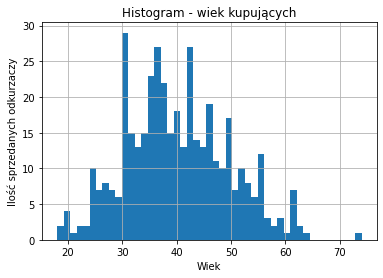

In [5]:
bins = len(df['Wiek kupującego'].value_counts())

df['Wiek kupującego'].hist(bins=bins)
plt.title('Histogram - wiek kupujących')
plt.xlabel('Wiek')
plt.ylabel('Ilość sprzedanych odkurzaczy')
plt.show()

Najczęściej kupującymi są osoby znajdującego się w przedziale wiekowym 30-50 lat. Najmniej odkurzaczy natomiast zostało sprzedanym osobom po 65 roku życia.

### Jakiej płci są kupujący?

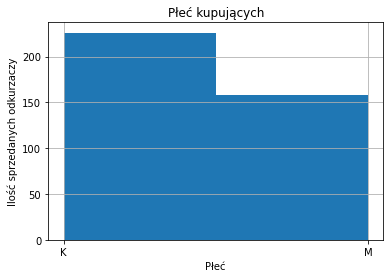

In [6]:
df['Płeć kupującego'].hist(bins=2)
plt.title('Płeć kupujących')
plt.xlabel('Płeć')
plt.ylabel('Ilość sprzedanych odkurzaczy')
plt.show()

Przewagę, jeśli chodzi o kupione odkurzacze mają kobiety. W ich posiadaniu znalazło się o ponad 50 odkurzaczy więcej.

### Na jakim poziomie kształtuje się ocena odkurzacza?

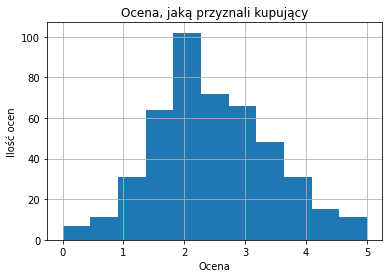

In [7]:
df['Ocena'].hist(bins=11)
plt.title('Ocena, jaką przyznali kupujący')
plt.xlabel('Ocena')
plt.ylabel('Ilość ocen')
plt.show()

Najczęściej przyznawaną oceną było 2.0. Wykres pokazuje także, że większość klientów jest umiarkowanie zadowolonych. Natomiast jeśli chodzi o osoby nieusatysfakcjonowane oraz, antagonistycznie, ogromnie szczęśliwe z zakupy, to jest ich niewiele, jednak osób mających pozytywne odczucia jest więcej.

## Analiza danych poprzez wyszczególnienie zależności zmiennych

### Zależność oceny od marki

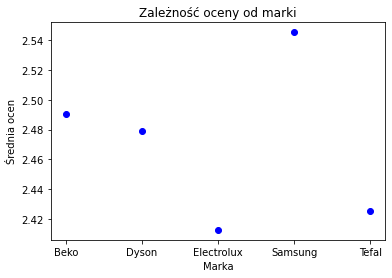

In [8]:
df_mark = df[['Marka', 'Ocena']]
df_mark = df_mark.dropna()
df_mark = df_mark.groupby(by='Marka').mean()

plt.plot(df_mark, 'bo')
plt.title('Zależność oceny od marki')
plt.xlabel('Marka')
plt.ylabel('Średnia ocen')
plt.show()

Najlepszą opinią cieszą się odkurzacze firmy Samsung, natomiast najgorsze zdaniem klientów są odkurzacze firmy Electrolux. Różnice w średniej ocen nie są jednak przesadnie duże, mieszczą się w zakresie 0.15 jeśli chodzi o średnią.

### Zależność wieku i płci kupujących

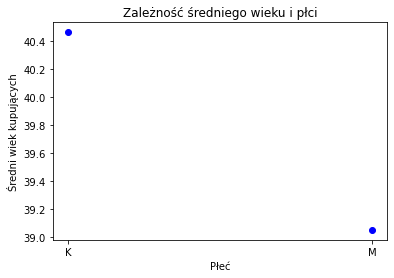

In [9]:
df_age_sex = df[['Wiek kupującego', 'Płeć kupującego']]
df_age_sex = df_age_sex.dropna()
df_age_sex = df_age_sex.groupby(by='Płeć kupującego').mean()

plt.plot(df_age_sex, 'bo')
plt.title('Zależność średniego wieku i płci')
plt.xlabel('Płeć')
plt.ylabel('Średni wiek kupujących')
plt.show()

Z powyższego wykresu widać, że wyższa średnia wieku występuje u kobiet i jest na poziomie ponad 40 lat. Średni wiek kupujących mężczyzn wynosi około 39 lat. 

### Zależność wybieranej marki od wieku klientów

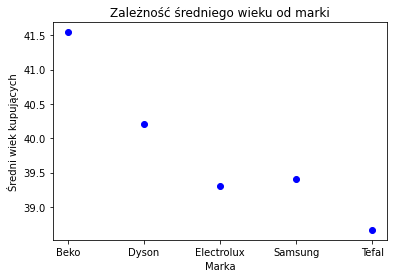

In [10]:
df_age = df[['Wiek kupującego', 'Marka']]
df_age = df_age.dropna()
df_age = df_age.groupby(by='Marka').mean()

plt.plot(df_age, 'bo')
plt.title('Zależność średniego wieku od marki')
plt.xlabel('Marka')
plt.ylabel('Średni wiek kupujących')
plt.show()

Najstarszą grupą klientów cechuje się firma Beko, natomiast do młodszych klientów bardziej trafia marka Tefal.

### Zależność oceny od płci

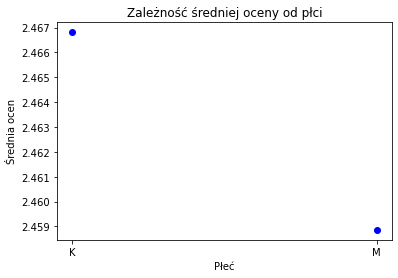

In [11]:
df_sex = df[['Płeć kupującego', 'Ocena']]
df_sex = df_sex.dropna()
df_sex = df_sex.groupby(by='Płeć kupującego').mean()

plt.plot(df_sex, 'bo')
plt.title('Zależność średniej oceny od płci')
plt.xlabel('Płeć')
plt.ylabel('Średnia ocen')
plt.show()

Patrząc na oś Y, a więc na średnią ocen widać dokładność do trzeciego miejsca po przecinku. Świadczy to o tym, że różnice w przyznawaniu ocen między osobami różnej płci są niewielkie. Można jednak zauważyć, że odrobinę wyższa średnia występuje u kobiet.